# Activation Functions!

Throughout this notebook, we will be sharing a number of **activation functions** found in neural networks. Alongside each respective activation function, we will provide an intuition of when / why you would use each across different contexts, and we will also provide the mathematical calculation behind each.

## Notebook Setup
Let's set ourselves up for success by setting up the Python stuff we'll be using throughout this notebook.

In [1]:
# Importing the necessary Python libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Why Activation Functions?
Before we talk about each of the individual activation functions, let's provide an overall intuition of why they are important in the context of neural networks. While there are several uses for activation functions, the chief among them is **to introduce non-linearity to the output of a neuron**. What exactly does that mean? Let's demonstrate with a very simple neural network.

<img src="admin/act_funcs_basic_nn.png" width="1000"/>

In this tiny neural network, we have just a single layer with two neurons, and we've fixed the weights and biases in each neuron. Now, if you look at the functions within each of the neurons, you'll notice that these are simple, linear functions. In fact, let's go ahead and graph them out to demonstrate their linear nature.

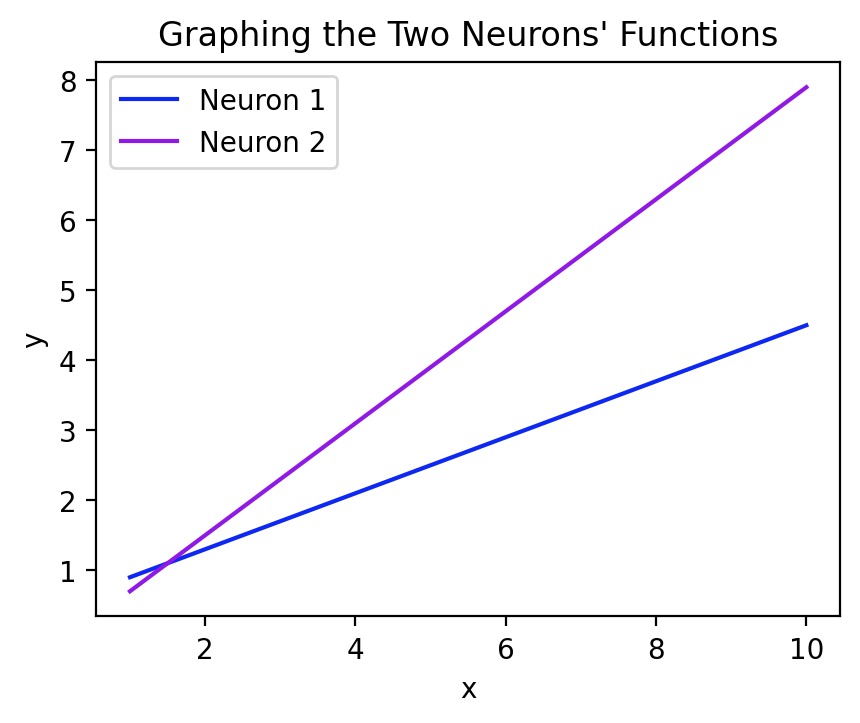

In [2]:
# Creating a set of sample input values
x = np.linspace(start = 1, stop = 10, num = 11)

# Creating linear functions for each of the respective neurons
neuron_1 = 0.4 * x + 0.5
neuron_2 = 0.8 * x - 0.1

# Graphing the first neuron
plt.plot(x, neuron_1, label = 'Neuron 1', color = '#0C28F2')

# Graphing the second neuron
plt.plot(x, neuron_2, label = 'Neuron 2', color = '#9119E5')

# Makin' it pretty!
plt.title("Graphing the Two Neurons' Functions")
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc = 'best')
plt.show();

Now, what happens when you add two linear functions together? Or put more simply, what happens when you add two lines together? Well, you get another line. Let's go ahead and graph this new line.

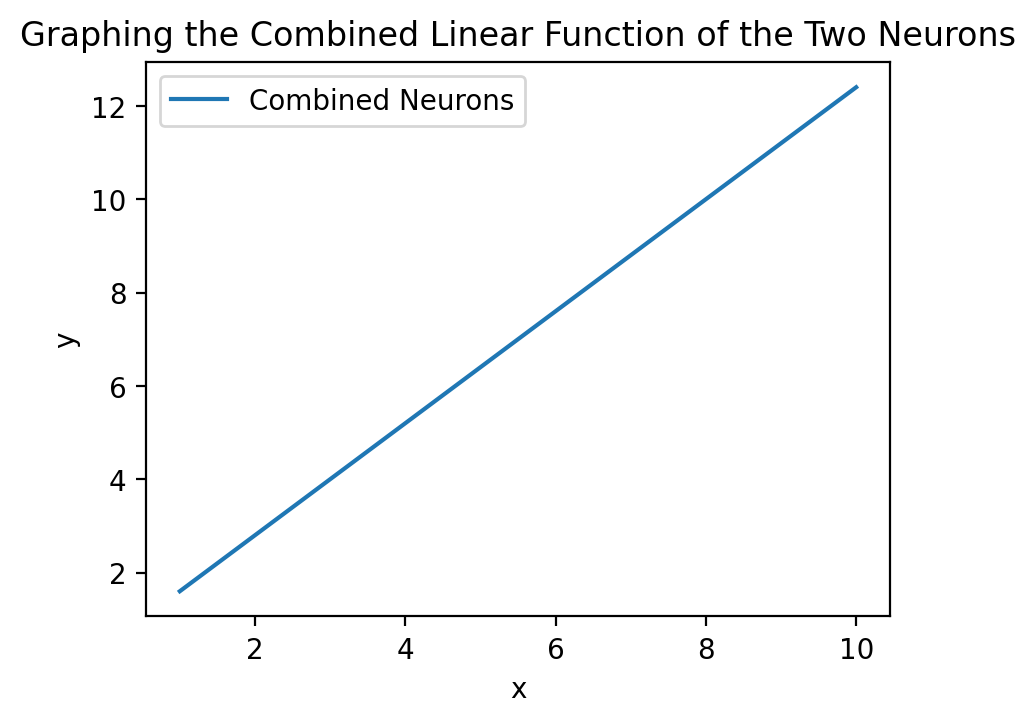

In [3]:
# Creating a set of sample input values
x = np.linspace(start = 1, stop = 10, num = 11)

# Creating the function combining the two neurons together
combined_neurons = 1.2 * x + 0.4

# Graphing the combined linear function
plt.plot(x, combined_neurons, label = 'Combined Neurons')

# Makin' it pretty!
plt.title("Graphing the Combined Linear Function of the Two Neurons")
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc = 'best')
plt.show();

Now, I hope you're beginning to appreciate the problem here: a line isn't going to cleanly separate data. More specifically, most data is going to look like this:

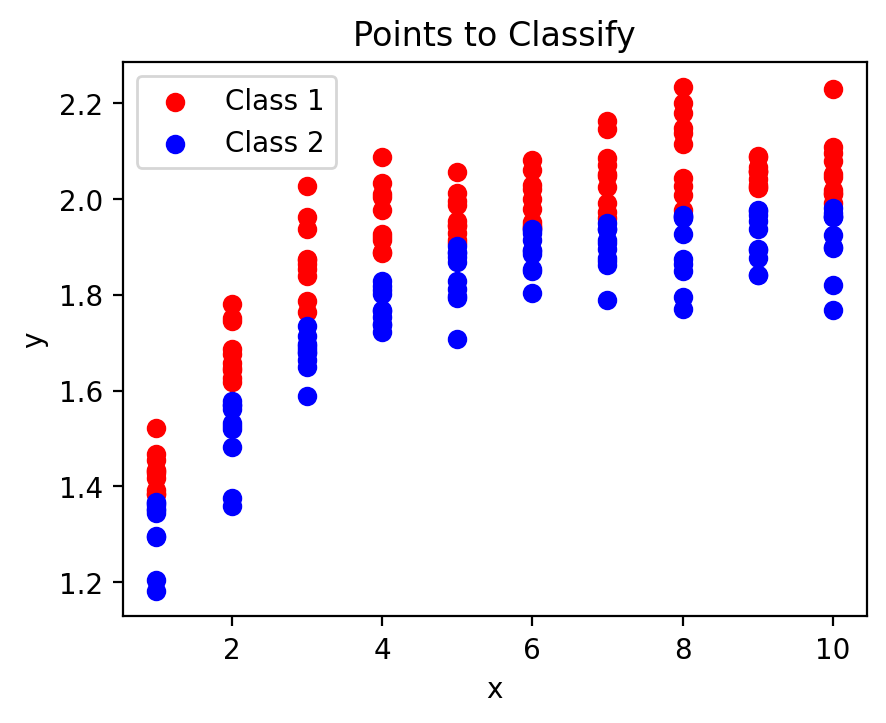

In [4]:
# Creating a set of sample input values
x = np.linspace(start = 1, stop = 10, num = 10)

# Setting weights and biases for each of the two neurons
weights = np.array([0.4, 0.8])
biases = np.array([0.5, -0.1])

# Creating a container to hold the weighted sums
outputs = []

# Creating a simple sigmoid function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Calculating the weighted sum for each neuron
for input_value in x:
    neural_outputs = []
    for weight, bias in zip(weights, biases):
        neural_outputs.append(sigmoid(input_value * weight + bias))
    outputs.append(sum(neural_outputs))

# Setting the number of points per class and standard deviation
num_points_per_class = 10
std_dev = 0.1

# Instantiating containers to hold the class 1 and class 2 values
y_class1 = []
y_class2 = []

# Iterating over the original outputs
for output in outputs:
    
    # Ensuring class 1 points are above the line
    y_class1.extend(output + np.abs(np.random.normal(0, std_dev, num_points_per_class)))
    
    # Ensuring class 2 points are below the line
    y_class2.extend(output - np.abs(np.random.normal(0, std_dev, num_points_per_class)))

# Plotting the points
plt.scatter((np.repeat(x, num_points_per_class)), y_class1, color = 'red', label = 'Class 1')
plt.scatter((np.repeat(x, num_points_per_class)), y_class2, color = 'blue', label = 'Class 2')

# Makin' it pretty
plt.title('Points to Classify')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc = 'best')
plt.show();

Just for fun, let's apply that same combined line from above and see how the points fare.

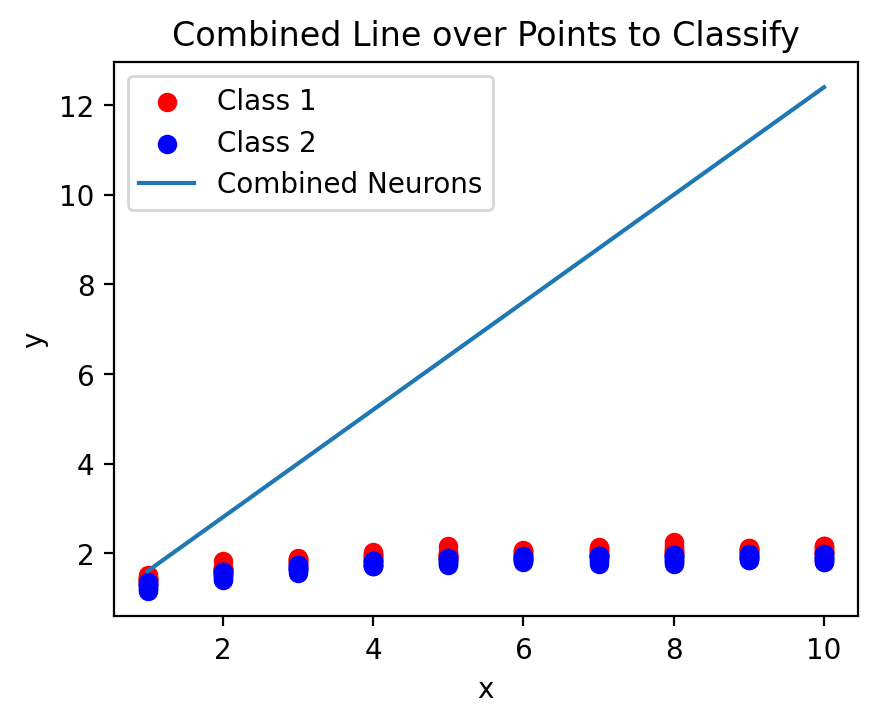

In [5]:
# Creating a set of sample input values
x = np.linspace(start = 1, stop = 10, num = 10)

# Setting weights and biases for each of the two neurons
weights = np.array([0.4, 0.8])
biases = np.array([0.5, -0.1])

# Creating a container to hold the weighted sums
outputs = []

# Creating a simple sigmoid function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Calculating the weighted sum for each neuron
for input_value in x:
    neural_outputs = []
    for weight, bias in zip(weights, biases):
        neural_outputs.append(sigmoid(input_value * weight + bias))
    outputs.append(sum(neural_outputs))

# Setting the number of points per class and standard deviation
num_points_per_class = 10
std_dev = 0.1

# Instantiating containers to hold the class 1 and class 2 values
y_class1 = []
y_class2 = []

# Iterating over the original outputs
for output in outputs:
    
    # Ensuring class 1 points are above the line
    y_class1.extend(output + np.abs(np.random.normal(0, std_dev, num_points_per_class)))
    
    # Ensuring class 2 points are below the line
    y_class2.extend(output - np.abs(np.random.normal(0, std_dev, num_points_per_class)))
    
# Plotting the points
plt.scatter((np.repeat(x, num_points_per_class)), y_class1, color = 'red', label = 'Class 1')
plt.scatter((np.repeat(x, num_points_per_class)), y_class2, color = 'blue', label = 'Class 2')

# Creating a set of sample input values
x = np.linspace(start = 1, stop = 10, num = 11)

# Creating the function combining the two neurons together
combined_neurons = 1.2 * x + 0.4

# Graphing the combined linear function
plt.plot(x, combined_neurons, label = 'Combined Neurons')

# Makin' it pretty
plt.title('Combined Line over Points to Classify')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc = 'best')
plt.show();

As you can see, this line doesn't even come close to measuring the accuracy of the classifications because the line has only grown and grown and grown.

Now, let's simulate what happens when we add an activation function. Don't worry about the details for now as we'll get to them later, but for this example, we're going to apply a simple **sigmoid** activation function. This particular activation function will take all the output values from the hidden layer and transform them one more time on an s-like curve produced by the sigmoid function. Let's take a look at what this output looks like now.

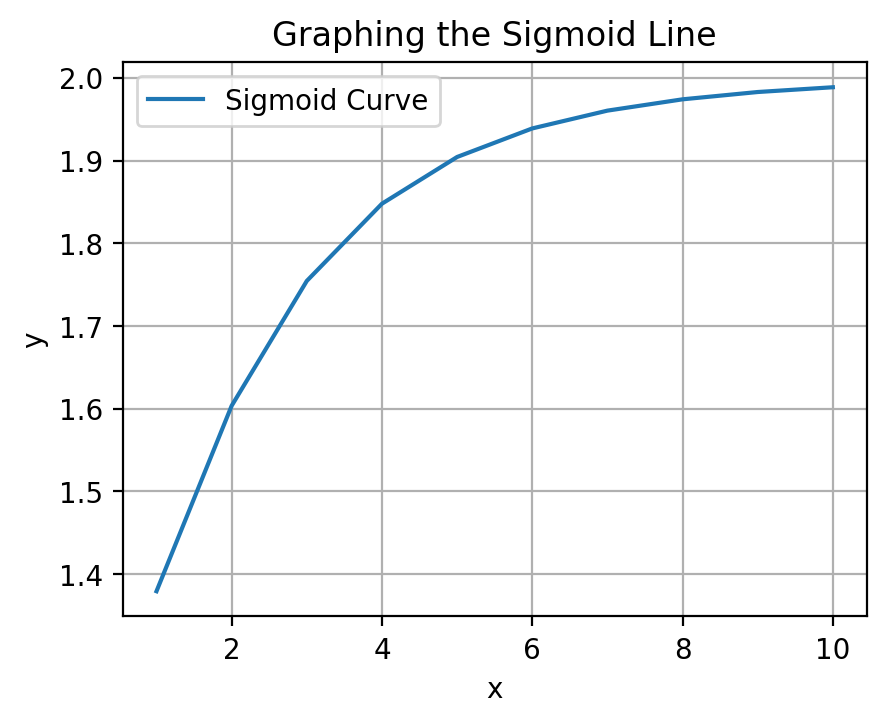

In [6]:
# Creating a set of sample input values
x = np.linspace(start = 1, stop = 10, num = 10)

# Setting weights and biases for each of the two neurons
weights = np.array([0.4, 0.8])
biases = np.array([0.5, -0.1])

# Creating a container to hold the weighted sums
outputs = []

# Calculating the weighted sum for each neuron
for input_value in x:
    neural_outputs = []
    for weight, bias in zip(weights, biases):
        neural_outputs.append(sigmoid(input_value * weight + bias))
    outputs.append(sum(neural_outputs))

# Graphing the sigmoid line
plt.plot(x, outputs, label = 'Sigmoid Curve')

# Makin' it pretty!
plt.title("Graphing the Sigmoid Line")
plt.xlabel('x')
plt.ylabel('y')
plt.grid()
plt.legend(loc = 'best')
plt.show();

Gone is the straight line, and we are now left with a gentle curve accelerating a bit more quickly in the beginning but then tapering off to right around 2.0. Let's see how this new line fares attempting to classify the same data points we showed above.

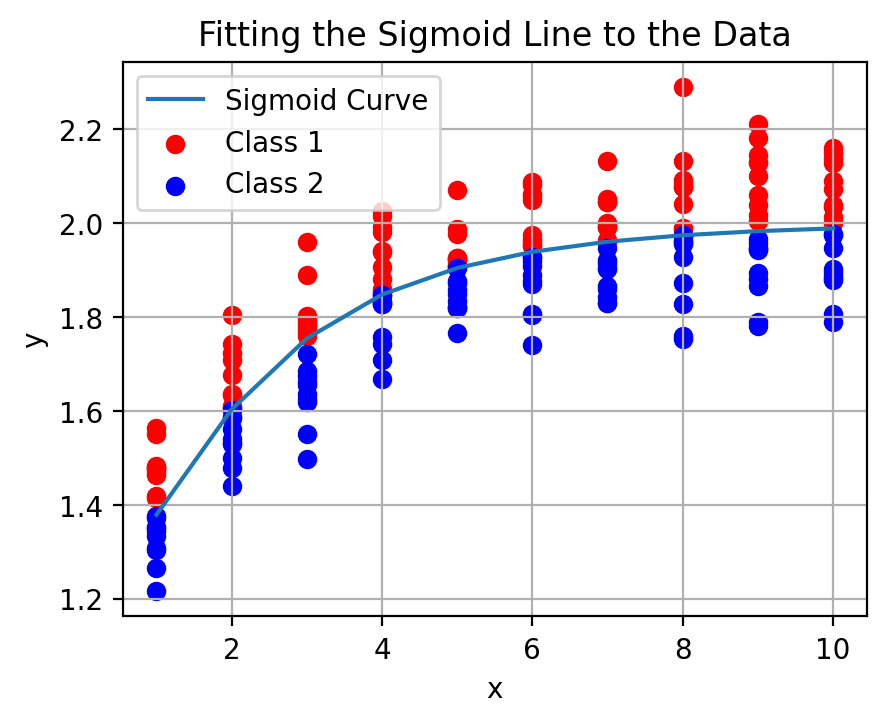

In [8]:
# Creating a set of sample input values
x = np.linspace(start = 1, stop = 10, num = 10)

# Setting weights and biases for each of the two neurons
weights = np.array([0.4, 0.8])
biases = np.array([0.5, -0.1])

# Creating a container to hold the weighted sums
outputs = []

# Calculating the weighted sum for each neuron
for input_value in x:
    neural_outputs = []
    for weight, bias in zip(weights, biases):
        neural_outputs.append(sigmoid(input_value * weight + bias))
    outputs.append(sum(neural_outputs))

# Graphing the sigmoid line
plt.plot(x, outputs, label = 'Sigmoid Curve')

# Creating a simple sigmoid function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Setting the number of points per class and standard deviation
num_points_per_class = 10
std_dev = 0.1

# Instantiating containers to hold the class 1 and class 2 values
y_class1 = []
y_class2 = []

# Iterating over the original outputs
for output in outputs:
    
    # Ensuring class 1 points are above the line
    y_class1.extend(output + np.abs(np.random.normal(0, std_dev, num_points_per_class)))
    
    # Ensuring class 2 points are below the line
    y_class2.extend(output - np.abs(np.random.normal(0, std_dev, num_points_per_class)))

# Plotting the points
plt.scatter((np.repeat(x, num_points_per_class)), y_class1, color = 'red', label = 'Class 1')
plt.scatter((np.repeat(x, num_points_per_class)), y_class2, color = 'blue', label = 'Class 2')

# Makin' it pretty!
plt.title("Fitting the Sigmoid Line to the Data")
plt.xlabel('x')
plt.ylabel('y')
plt.grid()
plt.legend(loc = 'best')
plt.show();

Much better! Now as you can probably guess, this example was cooked up by me to work out exactly perfectly, but the principle still stands: **Non-linearity is an absolute must for neural networks to perform optimally!** While this principle is perhaps the most important function that an activation function serves, there are a few other benefits that activation functions can provide. These include things like...

- **Control of information flow**: We'll touch on this one more a little later on, but there are certain activation functions that only allow certain values to pass through. Or, the output values that they produce come in a form restricted to a specific range of numbers. There are benefits to why we would want to do this, but again, we'll cover those when we get to those respective activation functions in the next section.
- **Determining the final behavior of the neural network**: In other words, we can use activation functions to produce either a binary class classification or a multiclass classification.
- **Mitigating vanishing gradient concerns**: There is a concern in many neural networks of a vanishing gradient problem. While we will not cover what this means in detail here, just be aware that certain activation functions like the ReLU function can help to mitigate these concerns.

Okay, that's our introduction to what activation functions and how they are generally beneficial to neural networks! Let's get into the nitty gritty and learn about those finer grained details by exploring twelve different types of activation functions.

## Twelve Different Types of Activation Functions
Throughout the remainder of this post, we will focus more intently on twelve different types of activation functions. In reality, you will likely only come across a few of these as some have tended to work better in broader context. To this end, we will cover each of these in a way that makes ideal sense to the learner, but be aware that there is no hierarchy of importance in the ordering.

### Sigmoid
Oftentimes referred to as the sigmoid "squishification" function, this s-shaped curve takes in any input and "squishes" it down between a range from 0 to 1. Here is the mathematical formula for calculating the sigmoid function:

$$ \sigma(x) = \frac{1}{1 + e^{-x}} $$

If you're not familiar with that *e* character there, that actually represents Euler's number, which is a constant value that is approximately 2.71828. While it's tempting to think that the *e* stands for Euler, that's actually just coincidence. We won't cover the number *e* within depth here, but I highly encourage that you check out [this YouTube video](https://youtu.be/AuA2EAgAegE?si=OweCYySETEy0Qrgt) to get a better intuition on it.

Here is what the sigmoid function looks like when graphed:

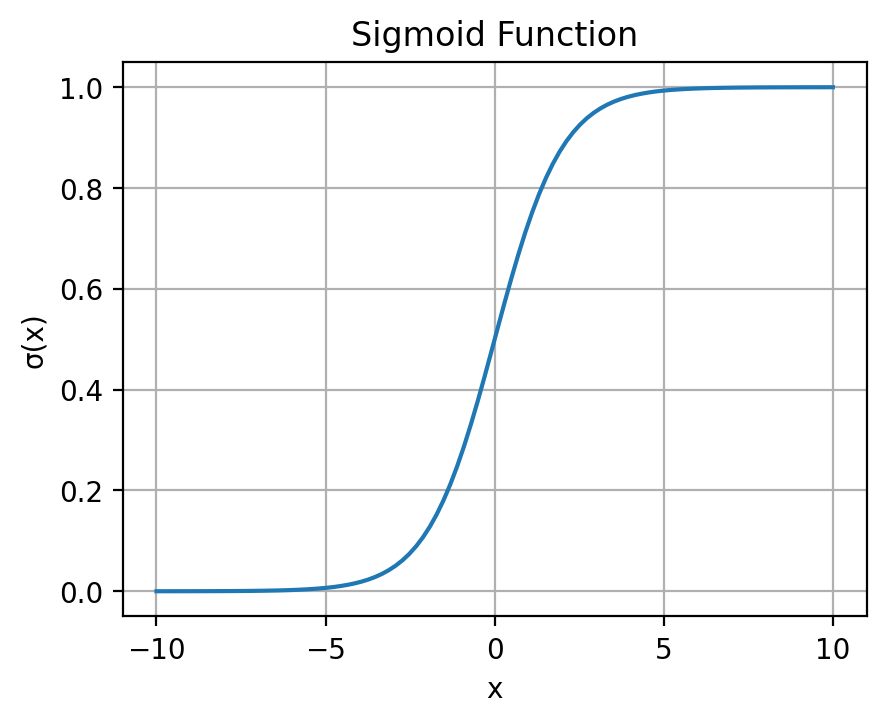

In [10]:
# Defining the sigmoid function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Generating a range of values between -10 and 10
x = np.linspace(-10, 10, 100)

# Calculating the sigmoid values based on the input 
y = sigmoid(x)

# Makin' it pretty
plt.plot(x, y)
plt.title('Sigmoid Function')
plt.xlabel('x')
plt.ylabel('σ(x)')
plt.grid(True)
plt.show()